In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel('test.xlsx')

In [4]:
df_train.head()

T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -73  -75  -63   
1 -77 -74 -71 -76 -65 -63 -66 -52 -55  -75  -72  -75  -74  -61  -64  -63  -53   
2 -53 -38 -55 -66 -62 -62 -65 -70 -62  -52  -56  -53  -66  -68  -72  -60  -68   
3 -72 -62 -59 -65 -65 -65 -78 -82 -83  -59  -84  -60  -64  -83  -69  -72  -95   
4 -67 -69 -65 -63 -59 -53 -70 -72 -71  -60  -61  -57  -54  -76  -61  -66  -71   

   T18 target  
0  -77    B37  
1  -63    B61  
2  -77    A19  
3  -73    A22  
4  -80    A33

In [7]:
df_train.describe()

T1            T2            T3            T4            T5  \
count  36752.000000  36752.000000  36752.000000  36752.000000  36752.000000   
mean     -65.865449    -64.521931    -64.574472    -65.296474    -64.462152   
std        8.737286      8.914559      8.154517      8.142803      8.068375   
min      -95.000000    -95.000000    -95.000000    -95.000000    -95.000000   
25%      -72.000000    -70.000000    -70.000000    -70.000000    -69.000000   
50%      -66.000000    -65.000000    -64.000000    -66.000000    -65.000000   
75%      -61.000000    -59.000000    -59.000000    -61.000000    -59.000000   
max      -41.000000    -37.000000    -41.000000    -39.000000    -36.000000   

                 T6            T7            T8            T9           T10  \
count  36752.000000  36752.000000  36752.000000  36752.000000  36752.000000   
mean     -63.318731    -67.030202    -66.591260    -65.692479    -65.555181   
std        8.651501      9.257529     10.160193     10.598247     10.408147   
min      -95.000000    -95.000000    -95.000000    -95.000000    -95.000000   
25%      -69.000000    -74.000000    -75.000000    -73.000000    -73.000000   
50%      -63.000000    -66.000000    -66.000000    -65.000000    -65.000000   
75%      -57.000000    -60.000000    -59.000000    -58.000000    -58.000000   
max      -39.000000    -45.000000    -39.000000    -39.000000    -37.000000   

                T11           T12           T13           T14           T15  \
count  36752.000000  36752.000000  36752.000000  36752.000000  36752.000000   
mean     -65.681922    -66.244204    -63.962614    -64.399080    -64.550011   
std        9.453958      8.866239      8.254217      9.562839      9.207343   
min      -95.000000    -95.000000    -95.000000    -95.000000    -95.000000   
25%      -71.000000    -72.000000    -69.000000    -70.000000    -70.000000   
50%      -65.000000    -66.000000    -63.000000    -64.000000    -65.000000   
75%      -59.000000    -61.000000    -58.000000    -58.000000    -58.000000   
max      -40.000000    -43.000000    -43.000000    -39.000000    -38.000000   

                T16           T17           T18  
count  36752.000000  36752.000000  36752.000000  
mean     -64.136782    -65.910726    -66.590417  
std       10.540542     10.071973     10.600992  
min      -95.000000    -95.000000    -95.000000  
25%      -71.000000    -72.000000    -74.000000  
50%      -63.000000    -65.000000    -66.000000  
75%      -57.000000    -59.000000    -59.000000  
max      -40.000000    -43.000000    -39.000000

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [8]:
df_train.duplicated().any()

True

In [9]:
df_train.duplicated().sum()

1267

In [10]:
df_train.isna().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15752 entries, 0 to 15751
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T1      15752 non-null  int64
 1   T2      15752 non-null  int64
 2   T3      15752 non-null  int64
 3   T4      15752 non-null  int64
 4   T5      15752 non-null  int64
 5   T6      15752 non-null  int64
 6   T7      15752 non-null  int64
 7   T8      15752 non-null  int64
 8   T9      15752 non-null  int64
 9   T10     15752 non-null  int64
 10  T11     15752 non-null  int64
 11  T12     15752 non-null  int64
 12  T13     15752 non-null  int64
 13  T14     15752 non-null  int64
 14  T15     15752 non-null  int64
 15  T16     15752 non-null  int64
 16  T17     15752 non-null  int64
 17  T18     15752 non-null  int64
dtypes: int64(18)
memory usage: 2.2 MB


In [12]:
duplicate = df_train[df_train.duplicated()]

In [13]:
df_train_Dr = df_train.copy()

In [14]:
df1=df_train_Dr.drop_duplicates()

In [15]:
df1.shape

(35485, 19)

In [16]:
df_train.shape

(36752, 19)

In [17]:
df1.drop(axis=1,columns="target",inplace=True)

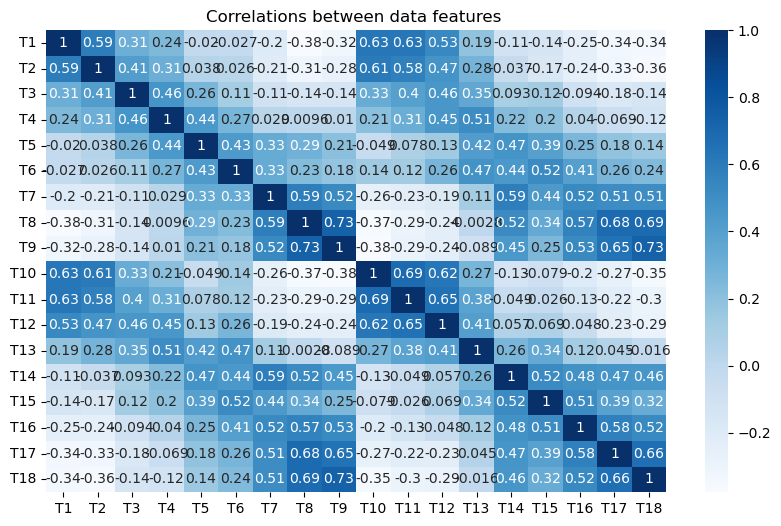

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True,cmap='Blues')
plt.title('Correlations between data features ')
plt.show()
plt.tight_layout()

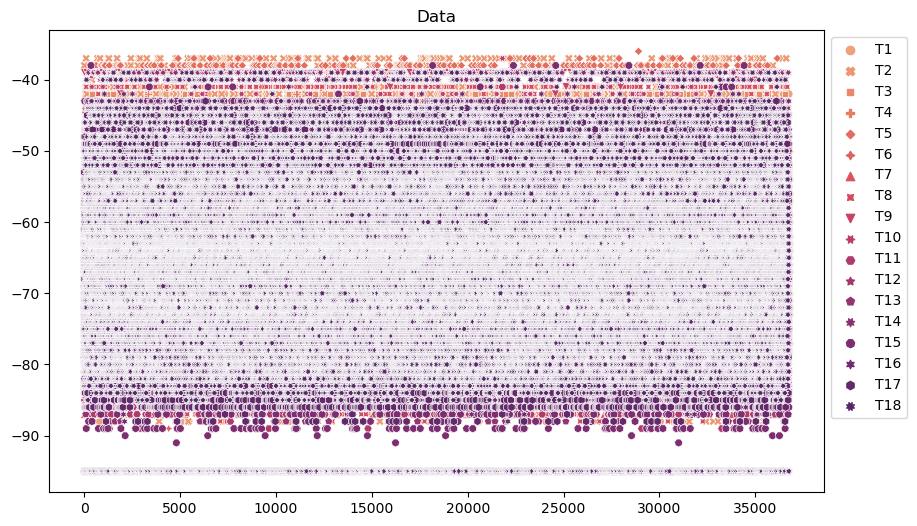

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= df1,palette='flare')
plt.title('Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [21]:
df_test1 = df_test.copy()

In [22]:
sc= StandardScaler()
x = sc.fit_transform(df1)
x

array([[-0.50389802,  0.39323599, -0.18024781, ..., -1.0351672 ,
         0.283094  , -1.02076201],
       [-1.3191932 , -1.05845399, -0.79010815, ...,  0.10770634,
         1.29217375,  0.33185894],
       [ 1.47610458,  2.96161056,  1.16144496, ...,  0.39342473,
        -0.22144587, -1.02076201],
       ...,
       [ 2.75728273,  0.72824137, -0.91208022, ..., -0.55896989,
        -0.9278017 , -0.73091466],
       [ 1.8255168 ,  1.62158904, -0.66813608, ..., -0.93992774,
        -0.62507777, -1.40722514],
       [-0.03801505,  0.05823061, -0.66813608, ...,  0.29818527,
        -0.1205379 ,  0.13862738]])

In [23]:
sc= StandardScaler()
y = sc.fit_transform(df_test1)
y

array([[-1.15680286, -2.05114505, -0.67103324, ..., -0.54792197,
         0.59284254,  0.63077694],
       [ 0.89896217,  0.83256454, -1.64957776, ..., -1.78823581,
        -0.80716581, -1.279845  ],
       [-0.47154785, -0.60929025, -0.79335131, ..., -1.02496576,
         0.89284433, -0.32453403],
       ...,
       [-1.15680286, -0.27655453, -0.54871518, ..., -0.16628695,
         1.09284552,  1.20396352],
       [-0.35733868, -1.49658551, -0.05944291, ...,  0.02453057,
        -0.00716104, -0.22900293],
       [-0.92838452, -0.38746644, -0.67103324, ...,  0.69239186,
         1.39284731,  1.01290133]])

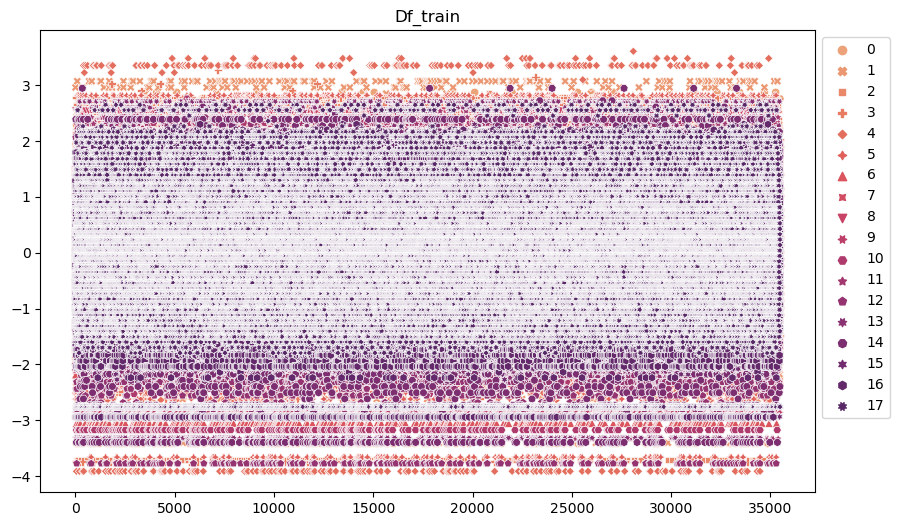

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= x,palette='flare')
plt.title('Df_train')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

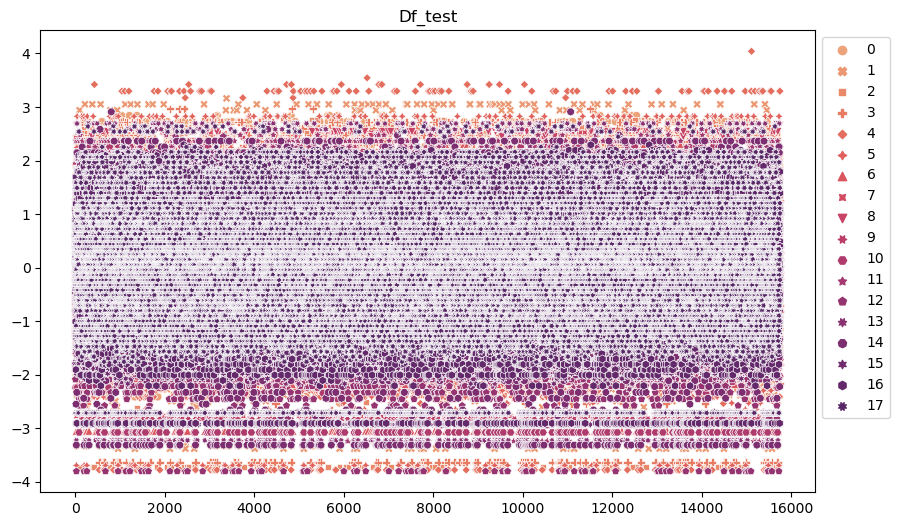

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= y,palette='flare')
plt.title('Df_test')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [26]:
#x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42)

In [27]:
k_m = KMeans()
k_mean = k_m.fit_predict(x)
k_mean

array([3, 4, 5, ..., 7, 7, 2])

In [28]:
train_kmean = silhouette_score(x,k_mean)

In [29]:
train_kmean

0.15778842797120668

In [30]:
k_mean_test = k_m.predict(y)
k_mean_test

array([4, 7, 4, ..., 4, 2, 4])

In [31]:
test_kmean = silhouette_score(y,k_mean_test)
test_kmean

0.15822000029534847

In [32]:
k_m.cluster_centers_

array([[-0.40994292, -0.00579947, -0.74247031, -1.16667511, -1.53422554,
        -1.41417448, -1.5907391 , -1.57740541, -1.63938529, -0.39614049,
        -0.55910386, -0.69774049, -1.11971189, -1.534092  , -1.94743888,
        -1.66227474, -1.4016592 , -1.62128671],
       [-0.4981882 , -0.53938646, -0.39240874, -0.32116675, -0.03407754,
         0.36914619,  0.64872152,  1.24813959,  1.21884965, -0.4729859 ,
        -0.24578323, -0.43738113, -0.22857196,  0.42337499,  0.16220952,
         0.85656439,  1.2656536 ,  1.15397749],
       [-0.16721255, -0.28730097, -0.08420696, -0.05766862,  0.64935894,
         0.83456568,  0.89445225,  0.32624575,  0.10993191, -0.08131462,
        -0.09498002,  0.02540741,  0.51499016,  1.07125373,  1.24999779,
         0.8463072 ,  0.45421323,  0.42273547],
       [-0.24822216, -0.04807088,  0.55003611,  0.61047582,  0.418433  ,
         0.416887  , -0.64078693, -0.53457077, -0.81696238,  0.18497951,
         0.13145204,  0.32665359,  0.74954959, -0.585

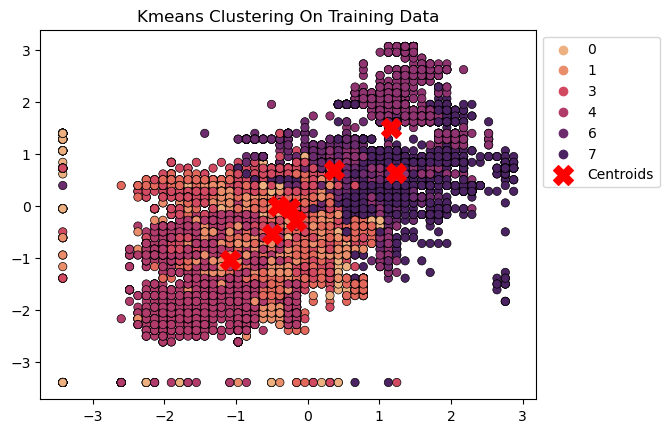

In [33]:
sns.scatterplot(x=x[:,0], y= x[:,1], data= x,hue=k_mean,palette='flare',edgecolor='k')
plt.scatter(k_m.cluster_centers_[:, 0], k_m.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [34]:
wcss = []
for i in range(1,21):
    k_m = KMeans(n_clusters=i)
    k_m.fit_predict(x)
    wcss.append(k_m.inertia_)

Text(0, 0.5, 'WCSS')

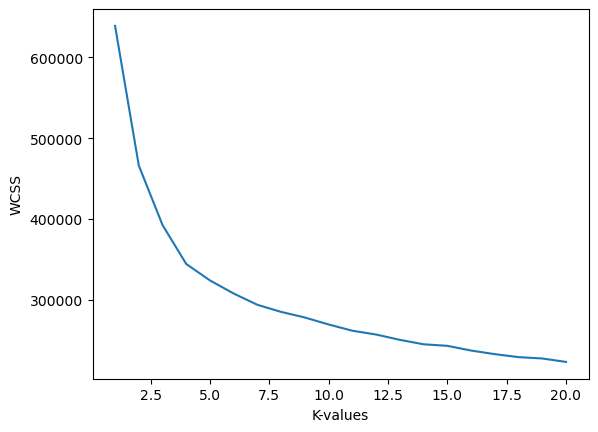

In [35]:
plt.plot(range(1,21), wcss)
plt.xlabel('K-values')
plt.ylabel('WCSS')

In [36]:
k_m1 = KMeans(n_clusters=4)
k_mean1 = k_m1.fit_predict(x)
k_mean1

array([1, 3, 1, ..., 2, 2, 0])

In [38]:
train_kmean1 = silhouette_score(x,k_mean1)
train_kmean1

0.19958793183495113

In [69]:
k_mean_final=KMeans(n_clusters=4,random_state=42)
k_mean_final.fit(x)
k_labels = k_mean_final.fit_predict(x)
print('silhouette_score :',silhouette_score(x, k_labels))
print(" labels:" , set(k_labels))

silhouette_score : 0.19960418648695447
 labels: {0, 1, 2, 3}


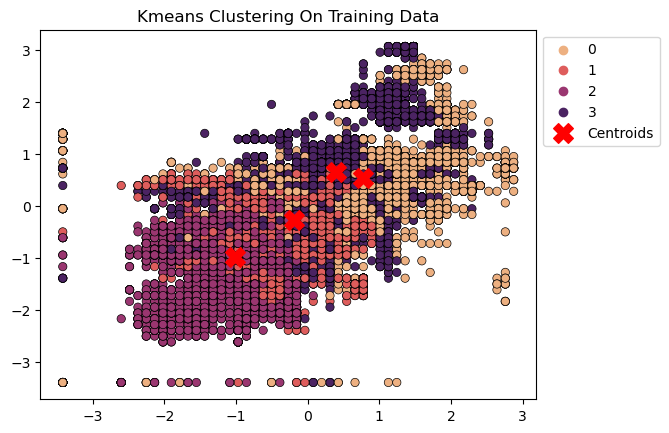

In [46]:
sns.scatterplot(x=x[:,0], y= x[:,1], data= x,hue=k_mean1,palette='flare',edgecolor='k')
plt.scatter(k_m1.cluster_centers_[:, 0], k_m1.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [39]:
k_m2 = KMeans(n_clusters=5)
k_mean2 = k_m2.fit_predict(x)
k_mean2

array([1, 2, 0, ..., 4, 4, 3])

In [40]:
train_kmean2 = silhouette_score(x,k_mean2)
train_kmean2

0.18387031060148767

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer

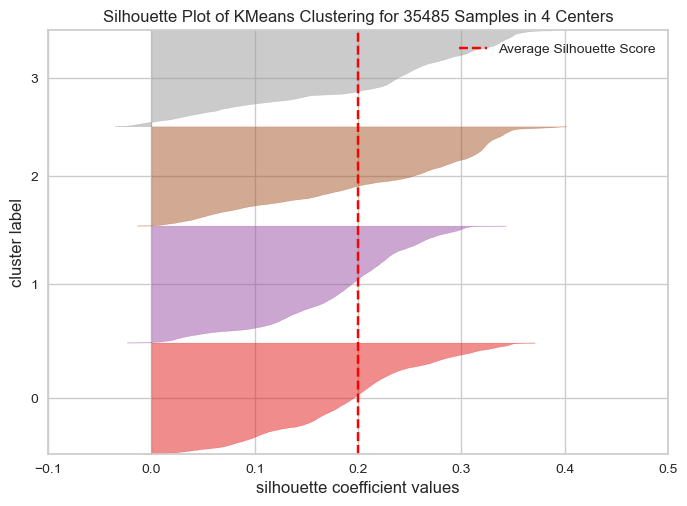

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 35485 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
model = KMeans(n_clusters=4)
vis = SilhouetteVisualizer(model)
vis.fit(x)
vis.show()

In [53]:
# DBscan

In [54]:
DB = DBSCAN()
train_DB = DB.fit_predict(x)
train_DB

array([  0,   1,   2, ..., 243, 119,  97], dtype=int64)

In [55]:
silhouette_score(x,train_DB)

0.4737453986192236

In [59]:
range_eps = [0.1,0.2,0.3,0.4,0.5,0.6]
for i in range_eps:
    print("eps value: "+str(i))
    db = DBSCAN(eps=i,min_samples=5).fit(x)
    core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    silhouette_avg = silhouette_score(x,labels)
    print("For eps value ="+str(i), labels ,"The average silhouette-score is: " ,silhouette_avg)

eps value: 0.1
{0, -1}
For eps value =0.1 [-1 -1 -1 ... -1 -1 -1] The average silhouette-score is:  -0.04124825245161441
eps value: 0.2
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194

For eps value =0.6 [  0   1   2 ... 236 126 104] The average silhouette-score is:  0.5487711751932928


In [61]:
min_samples = [1,2,3,4,5,6,7,8,9,10]
for i in min_samples:
    print("min-sample "+str(i))
    db = DBSCAN(eps=0.6,min_samples=i).fit(x)
    core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    silhouette_avg = silhouette_score(x,labels)
    print("min-sample"+str(i), "Total no. of clusters are" ,str(len(set(labels))))

min-sample 1
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 2

min-sample1 Total no. of clusters are 3621
min-sample 2
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210

min-sample6 Total no. of clusters are 285
min-sample 7
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,

# PCA

In [43]:
pca = PCA()
pcs = pca.fit_transform(x)
pcs

array([[ 0.58118541, -0.29556503,  1.98599135, ...,  0.5322155 ,
        -1.13012953, -0.53789863],
       [-2.86984806,  1.89463075, -0.44370315, ...,  0.63655398,
        -0.33686388,  0.2978392 ],
       [ 2.55269948, -2.01808222, -1.91145591, ...,  0.75511869,
         0.67243725, -0.10434763],
       ...,
       [ 4.1397575 ,  2.0797229 , -1.29259341, ..., -0.38762606,
        -0.29866399, -0.2984518 ],
       [ 3.05656378,  0.674475  , -0.50278159, ...,  0.21542481,
        -0.47279958, -0.27038126],
       [-2.21340835,  0.43221893,  0.97140059, ...,  0.29637505,
        -0.68675058, -0.21916018]])

In [44]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32882376, 0.55892803, 0.63136675, 0.68723513, 0.72719438,
       0.7616673 , 0.79150815, 0.8184426 , 0.84408356, 0.86789377,
       0.89026086, 0.91142965, 0.93073713, 0.94737029, 0.96207554,
       0.97628818, 0.98949051, 1.        ])

Text(0.5, 0.85, '95% cut-off threshold')

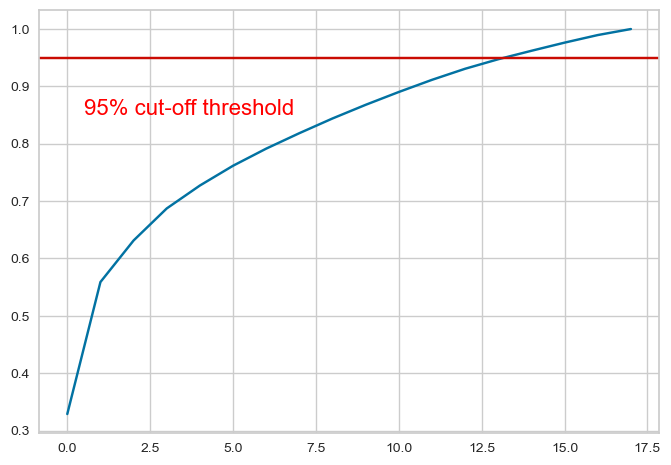

In [45]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)


In [46]:
pca = PCA(n_components=13)
pcs = pca.fit_transform(x)
pcs

array([[ 0.58118541, -0.29556503,  1.98599135, ...,  1.56897433,
         0.4524117 , -0.06539539],
       [-2.86984806,  1.89463075, -0.44370315, ...,  0.65127376,
         0.00673861,  0.47764707],
       [ 2.55269948, -2.01808222, -1.91145591, ..., -0.44897647,
        -0.31110328,  0.11111101],
       ...,
       [ 4.1397575 ,  2.0797229 , -1.29259341, ..., -1.23665555,
         0.06077131, -0.741048  ],
       [ 3.05656378,  0.674475  , -0.50278159, ..., -0.80008268,
         0.68868312,  0.5374307 ],
       [-2.21340835,  0.43221893,  0.97140059, ..., -0.74566322,
         0.69997966,  0.10929613]])

In [47]:
data = pd.DataFrame(pcs, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'])

In [48]:
data

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0      0.581185 -0.295565  1.985991 -1.542193 -0.012800  1.565235  0.274225   
1     -2.869848  1.894631 -0.443703  0.074468 -0.149307  0.017081 -0.121376   
2      2.552699 -2.018082 -1.911456 -0.718168  0.738852 -0.232120  0.067218   
3      3.157247  1.601182  2.261963  0.233251 -0.535758 -0.459680  0.027392   
4      1.429983 -1.035067  1.389744  1.328983 -0.712162  0.821513  0.352808   
...         ...       ...       ...       ...       ...       ...       ...   
35480  1.784752  0.693188  2.370420 -0.713662  1.149613  0.475002 -0.052661   
35481  0.316234 -3.337703 -0.718474 -1.043782  0.183563  0.082437  0.176782   
35482  4.139757  2.079723 -1.292593  0.422874  0.780445  0.957670  0.072507   
35483  3.056564  0.674475 -0.502782 -0.120031  1.644557  0.768195 -0.033246   
35484 -2.213408  0.432219  0.971401 -0.356037  1.705942 -0.145762  0.056790   

            pc8       pc9      pc10      pc11      pc12      pc13  
0      0.455988 -0.729239  0.451443  1.568974  0.452412 -0.065395  
1      0.654348 -0.676781  0.111948  0.651274  0.006739  0.477647  
2      0.754088  0.231213  1.477992 -0.448976 -0.311103  0.111111  
3      1.120481  0.996298  0.401833 -1.139737 -0.299458  0.021979  
4      0.103019 -0.419046  0.015034 -0.578545 -0.510379  0.524668  
...         ...       ...       ...       ...       ...       ...  
35480 -1.047506  0.014667  0.879867  0.297662 -0.230439  0.664245  
35481 -0.692465  0.208686  0.402719 -0.000873  0.623300 -0.378091  
35482 -0.804136  0.228028 -0.107123 -1.236656  0.060771 -0.741048  
35483 -0.647797 -0.314189  0.824053 -0.800083  0.688683  0.537431  
35484 -0.719507  0.201935  0.534913 -0.745663  0.699980  0.109296  

[35485 rows x 13 columns]

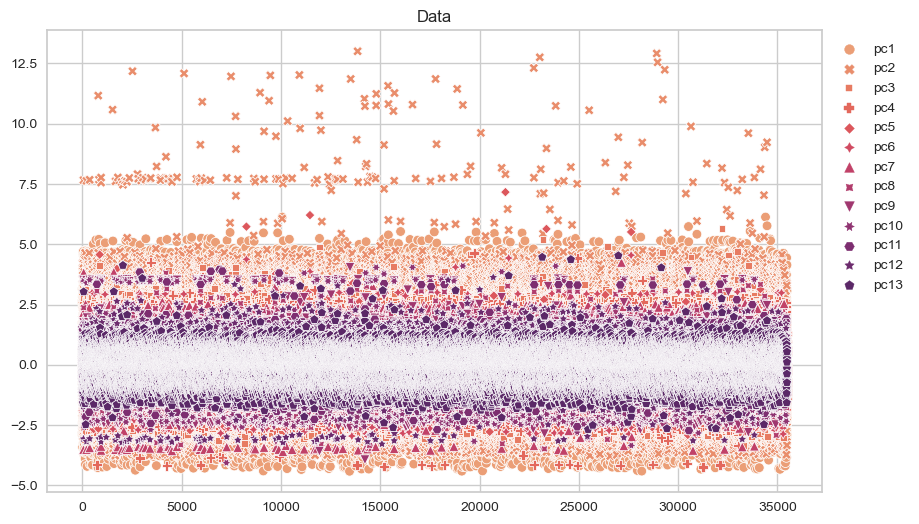

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= data,palette='flare')
plt.title('Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [50]:
k_m_pca = KMeans()
k_mean_pca = k_m_pca.fit_predict(data)
k_mean_pca

array([0, 4, 3, ..., 6, 6, 2])

In [53]:
train_kmean_pca = silhouette_score(data,k_mean_pca)
train_kmean_pca

0.16698784653813234

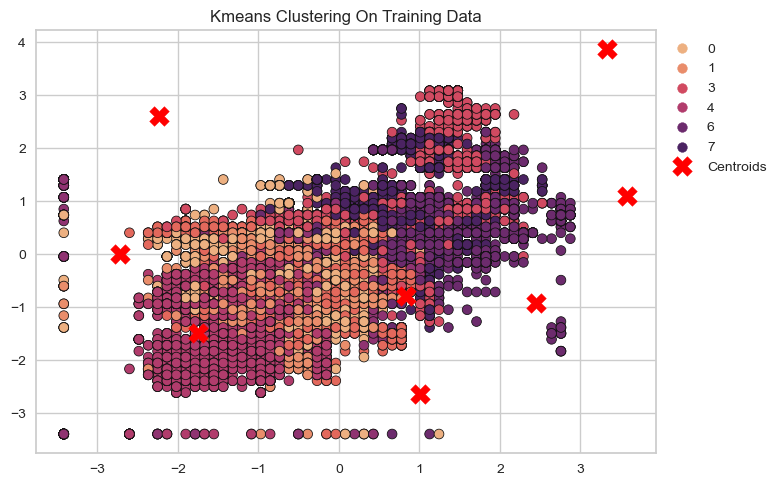

In [54]:
sns.scatterplot(x=x[:,0], y= x[:,1], data= data,hue=k_mean_pca,palette='flare',edgecolor='k')
plt.scatter(k_m_pca.cluster_centers_[:, 0], k_m_pca.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [55]:
wcss_pca = []
for i in range(1,21):
    k_m = KMeans(n_clusters=i)
    k_m.fit_predict(data)
    wcss_pca.append(k_m.inertia_)

Text(0, 0.5, 'WCSS')

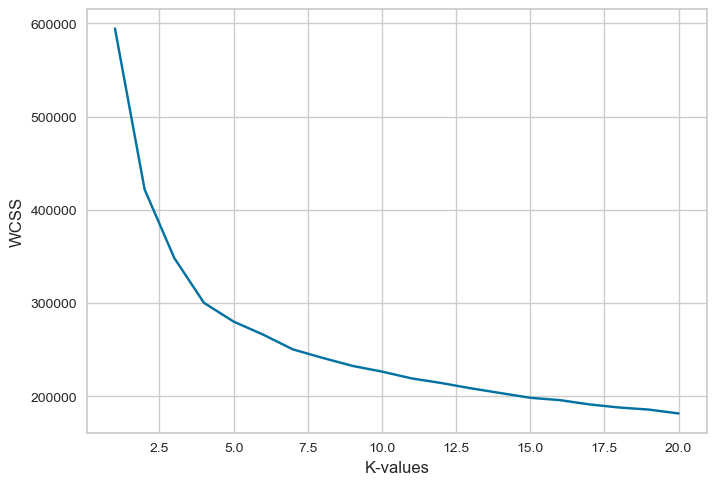

In [56]:
plt.plot(range(1,21), wcss_pca)
plt.xlabel('K-values')
plt.ylabel('WCSS')

In [57]:
k_m_pca1 = KMeans(n_clusters=4)
k_mean_pca1 = k_m_pca1.fit_predict(data)
k_mean_pca1

array([0, 3, 0, ..., 1, 1, 2])

In [58]:
train_kmean_pca1 = silhouette_score(data,k_mean_pca1)
train_kmean_pca1

0.22059602750074153

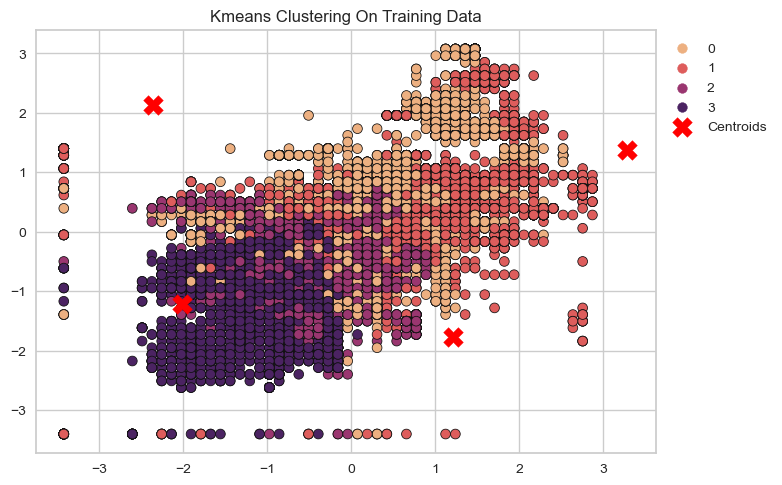

In [61]:
sns.scatterplot(x=x[:,0], y= x[:,1], data= data,hue=k_mean_pca1,palette='flare',edgecolor='k')
plt.scatter(k_m_pca1.cluster_centers_[:, 0], k_m_pca1.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

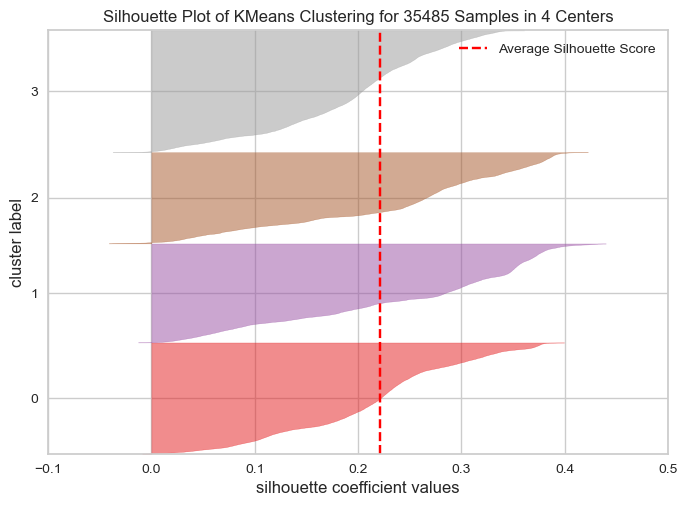

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 35485 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [66]:
model = KMeans(n_clusters=4)
vis = SilhouetteVisualizer(model)
vis.fit(data)
vis.show()

In [63]:
import pickle

In [71]:
pickle_out = open('k_mean_final.pkl',mode = 'wb')
pickle.dump(k_mean_final,pickle_out)
pickle_out.close()

In [65]:
pickle_out = open('k_mean_pca.pkl',mode = 'wb')
pickle.dump(k_mean_pca1,pickle_out)
pickle_out.close()